# 664 NLP Assignment 2
## Wanyue Xiao
## Due: March 11, 2020

The purpose of this assignment is to extract question sentences and imperative sentences from reviewtexts. Specifically, the question sentences should contain question mask '?' and adjective phrases. Similarly, the imperative sentences should contain exclamation mark '!', adjective phrases, and should start with verbs.

Before extracting the required sentences, one must import the NLTK package and other necessary functions. Then we should extract the review text from review_Content document and store that to review_text.

In [45]:
import nltk
from nltk import *
from nltk.corpus import treebank
import re
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [46]:
f = open('review_Content.txt')
review_text = f.read()

By using the len function, we find that the review_text contains 88129772 words.

In [47]:
len(review_text)

88129772

Now, since we want to extract sentences from the review text, we need to parse those texts to sentences by using RegExr. Before that, we should replace '\n' with blank space and then use RegExr to parse sentence.

In [48]:
review_text = review_text.replace('\n',' ')
sentence=re.compile("[A-Z].*?[\.\!\?]+", re.MULTILINE | re.DOTALL )
parsed_sentence = sentence.findall(review_text)

After parsing the review text, we have 1186416 sentences.

In [49]:
len(parsed_sentence)

1202086

<br>

## Sentence Extraction Part

To get a collection of imperative sentences that satiat requirements mentioned above, we need to splite those pared sentences into three which ends with exclamation mark, question mark, and stop mark respetively.

### Exclamation Sentence
For sentence that stops with exclamation mark, there are 111875 of them.

In [50]:
exclamation_sentence = [each for each in parsed_sentence if each[-1] == '!']
len(exclamation_sentence)

111875

However, after carefully review those sentences, we might find that some of them also contain question mark(s), making it difficult to identify those sentences. Then we need to find those sentences and store them into the special_combine1 object. Next, we might need to eliminate those sentences from the orginal exclamation_sentence. Finally, we can find that the number of exclamation_sentence has reduced to 111566.

In [51]:
special_combine1 = [each for each in exclamation_sentence if '?' in each]
exclamation_sentence = [each for each in exclamation_sentence if each not in special_combine1]
len(exclamation_sentence)

111566

### Question Sentence
Similarly, executing the same procedures in the processes of collecting question sentences and normal sentences which end with stop mark.

In [52]:
# Find sentence that ends with '?'
question_sentence = [each for each in parsed_sentence if '?' in each[-1]]
len(question_sentence)

8376

Find and store sentence that contains both '!' and '?' to special_combine2. Eliminate those sentences from the original question_sentence.

In [53]:
special_combine2 = [each for each in question_sentence if '!' in each]
question_sentence = [each for each in question_sentence if each not in special_combine2]
len(question_sentence)

8252

Combining the two special_combine list to one. We find that the number of sentence that contains both '?' and '!' is 433. 

In [54]:
# Gather those special sentences which contain both '?' and '!'
special_combine = special_combine1 + special_combine2
len(special_combine)

433

Checking those special sentences, we find that the emotion of those sentence is similar with that of exclamation sentence. Then we decide to combine the special_combine with exclamation_sentence.

In [55]:
special_combine[:10]

['Have they lost their minds??!!',
 "What's not to love, except the price?!",
 'Why do I have to try every pair on in my size to find the one that fits?!',
 "These can't be real Levi's?!",
 'I\'ve been crying ever since my breast augmentation (I didn\'t even go that big just from a B to a C cup) but since that 2 months ago I\'m like "HOW AM I GOING TO RUN WITH THESE ON MY CHEST???!!!',
 'Hmmmm, seems like the newer version of the same jeans I have are slightly different?!',
 "And who doesn't love all those pockets?!",
 'Managed to snag on my laptop bag (!?!',
 'The problem with these socks is that one of the pairs is tight, the other one is looser and comfortable, and the third one has a tight upper rim?!',
 'It looks great and similar to the Navitimer but like ten times less?!']

In [56]:
exclamation_sentence = exclamation_sentence + special_combine
len(exclamation_sentence)

111999

### Declarative Sentence
Finally, we can get a collection of sentence that ends with stop sign ('.'). For those sentence, we also find that some of them contain '!' or '?' inside. Then we can extract and save those sentences to special_combine3 (that contains '!') and to special_combine4 (that contain '?') respectively. Likewise, we should also eliminate those sentences from the original stop_sentence.

In [57]:
declarative_sentence = [each for each in parsed_sentence if '.' in each[-1]]
len(declarative_sentence)

1081835

In [58]:
special_combine3 = [each for each in declarative_sentence if '!' in each]
declarative_sentence = [each for each in declarative_sentence if each not in special_combine3]
special_combine4 = [each for each in declarative_sentence if '?' in each]
declarative_sentence = [each for each in declarative_sentence if each not in special_combine4]
len(declarative_sentence)

1081375

Additionally, if we go through the special_combine3 and special_combine4 separately, we find that the emotion of those sentence is similar with that of exclamation_sentence while that of special_combine4 is similar with that of question sentence(?).

In [59]:
special_combine3[:10]

['I am very long waisted and rather curvy and these are the ONLY briefs that I found that DO NOT RIDE UP!...',
 'I wish they had more colors!!!!!!.',
 'GREAT BUY!....',
 "Until it arrived two days ago, I still didn't know if the reviews were spot on, they were!.",
 'When I opened the box, WOW!..',
 'I put it?!....',
 'NO!.',
 'OVER A MONTH NOW AND NO PROBLEMS AT ALL!!!!!!!!!...',
 "BY THE WAY, I JUST PURCHASED MY FATHER IN-LAW ONE ON FATHER'S DAY AND HE LOVES IT!...",
 'WHAT A BEAUTIFUL WATCH!!!.']

In [60]:
special_combine4[:10]

['FOR $89 WHY NOT GIVE IT A TRY?...',
 'Unfortunately  i bougth two and i received just oneWhere is the other?.',
 'Unfortunately this bra fit way too tightly, more like a 32?.',
 'I thought: why not shrink-to-fit jeans?...',
 'They look at them and always ask &#34;Where did you get them?.',
 "What can I say about this watch that haven't been said yet?...",
 'Maybe the elastic strip was too tight?...',
 'One dislike - there a small horizontal stich on toe that looks like a defect??...',
 'HOW DO YOU NOT SCREAM WHEN YOU WALK IN THEM?.',
 'Why?...']

In [61]:
exclamation_sentence = exclamation_sentence + special_combine3
question_sentence = question_sentence + special_combine4

<br>

## POS Tagging and CFG Analysis

Gathering those sentences is not the end, we need to go further to find sentence that has 'adjective phrases' which might require use to use the POS tagging techniques.
<br> <br>
**Question Sentence POS Tagging**
<br>
* First of all, we might focus on the question sentence processing. 
* After tokenizing and tagging the question sentences, we can use 'JJ', 'JJR', and 'JJS' to find if those sentences contain these three tags. 
* If so, adding the tagged sentence to question_sentence_JJ object.

In [62]:
question_Token = [nltk.word_tokenize(sent) for sent in question_sentence]
question_POS = [nltk.pos_tag(each) for each in question_Token]
question_sentence_JJ = []
for each in question_POS:
    tag_fd = nltk.FreqDist(tag for (word, tag) in each)
    if 'JJ' in tag_fd.keys() or 'JJR' in tag_fd.keys() or 'JJS' in tag_fd.keys():
        question_sentence_JJ.append(each)

Now, we can claim that the number of question sentence that contain 'adjective phrases' is 4174.

In [63]:
len(question_sentence_JJ)

4174

Given that we might need the content of these tagged sentences, we might transform these tagged sentences to their original outlay (whcih are without tags). At last, storing the result to question_sentences object.

In [64]:
question_list = []
for each in question_sentence_JJ:
    for dic in each:
        question_list.append(dic[0])
question_lists = ' '.join(question_list)
question_sentences = sentence.findall(question_lists)

**Exclamation Sentence POS Tagging and CFG analysis**
<br>
To extract imperative sentences from the collected exclamation sentences, we need two steps. 
* Firstly, we need to find sentences that contain 'Adjective Phrases'. 
* Secondly, we need to find sentences that start with verb. For the first step, the process is similar with that of processing question sentences.

In [65]:
exclamation_Token = [nltk.word_tokenize(sent) for sent in exclamation_sentence]
exclamation_POS = [nltk.pos_tag(each) for each in exclamation_Token]
exclamation_sentence_JJ = []
for each in exclamation_POS:
    tag_fd = nltk.FreqDist(tag for (word, tag) in each)
    if 'JJ' in tag_fd.keys() or 'JJR' in tag_fd.keys() or 'JJS' in tag_fd.keys():
        exclamation_sentence_JJ.append(each)

The next step is to find sentence that starts with 'VP'. Specifically, tags that derives from 'VERB' are 'VB', 'VBD', 'VBG', 'VBN', 'VBP', and 'VBZ'. After the matching, storing the result to imperative_list object.

In [66]:
imperative_list = []
for each in exclamation_sentence_JJ:
    if 'VB' in each[0] or 'VBD' in each[0] or 'VBG' in each[0] or 'VBN' in each[0] or 'VBP' in each[0] or 'VBZ' in each[0]:
        imperative_list.append(each)

We only get 2125 sentences that satisfy the requirments of having '!' and 'Adjective Phrases' and of starting with verb.

In [67]:
len(imperative_list)

2125

Let's convert and store the sentence to a list object. The final result will be stored to imperative sentences object.

In [68]:
# Let's see convert and store the sentence to a list object and check what it contains
imperative_sentence = []
for each in imperative_list:
    for dic in each:
        imperative_sentence.append(dic[0])
imperative_lists = ' '.join(imperative_sentence)
imperative_sentences = sentence.findall(imperative_lists)

### Statistics Summary
The data frame listed below shows statistics information. Now we can summarised that the number of required question sentence is 4174 and that of required imperative sentence is 2125.

In [69]:
data = {'Information related with Review Text':['Words of Review Text', 'Parsed Sentence'],
       'Number':[len(review_text), len(parsed_sentence)],
       'Declarative Sentences':['Declarative Sentences', 'NA'], 
        'Number   ':[len(declarative_sentence), 'NA'],
       'Question Sentences':['Original Question Sentences', 'Required Question Sentence'], 
        'Number ':[len(question_sentence), len(question_sentence_JJ)],
       'Exclamation Sentence':['Original Exclamation Sentence', 'Required Imperative Sentence'], 
        'Number  ':[len(exclamation_sentence), len(imperative_list)]} 
df = pd.DataFrame(data) 
df

,Information related with Review Text,Number,Declarative Sentences,Number,Question Sentences,Number,Exclamation Sentence,Number
0,Words of Review Text,88129772,Declarative Sentences,1081375,Original Question Sentences,8315,Original Exclamation Sentence,112396
1,Parsed Sentence,1202086,NA,NA,Required Question Sentence,4174,Required Imperative Sentence,2125


<br>

## Analysis Part

### For Question_sentence Analysis
Calculate the average words per sentence and the the number of unique word contain in the question sentences.

In [94]:
total_get_count = ' '.join(question_sentences)
total_get_count = nltk.word_tokenize(total_get_count)
data = {'Statistics':['Average Word Per Sentence', 'Unique Words'],
       'Number':[len(total_get_count)/len(question_sentence), len(set(total_get_count))]} 
df = pd.DataFrame(data) 
df

,Statistics,Number
0,Average Word Per Sentence,8.855803
1,Unique Words,6777.000000


**Unigram Analysis:** 
<br>
Before removing the punctuations and stopwords, one can get the top 20 tokens that have the top frequency.

In [95]:
question_lower = [w.lower() for w in total_get_count]
ndist = FreqDist(question_lower)
nitems = ndist.most_common(20)

question_Uni_df = pd.DataFrame.from_records(nitems)
question_Uni_df.columns = ['Unigram', 'Score']
question_Uni_df

,Unigram,Score
0,?,4149
1,",",2565
2,the,2544
3,i,2102
4,a,1883
5,to,1309
6,it,1287
7,and,1221
8,is,1110
9,you,1015


The top 20 tokens do not provide much meaningful information since most of them are punctuations and stopwords. We can find that '?' has appeared 4742 times because what we are processing is the collection of question sentences. Besides, most of them are determinator or prepositions. Hence, we need to eliminate those words or punctuations.

In [96]:
quetion_alpha_words = [w for w in question_lower if w.isalpha()]
stopwords = nltk.corpus.stopwords.words('english')
question_stop_words = [w for w in quetion_alpha_words if w not in stopwords]
ndist = FreqDist(question_stop_words)
topkeys = ndist.most_common(20)

question_Uni_df = pd.DataFrame.from_records(topkeys)
question_Uni_df.columns = ['Unigram', 'Score']
question_Uni_df

,Unigram,Score
0,would,364
1,like,289
2,maybe,261
3,could,258
4,one,247
5,size,243
6,get,219
7,right,204
8,good,198
9,wear,193


According to the result, after excluding several function words like 'Would', 'Like', 'Maybe', and 'Could' etc., we can find that the nineth word is **'Good'**, indicating that the attitude of customers toward these reviewed product might be positive. Normally, the word **'right'** indicates 'positive attitude'. However, given that we are analyzing the question sentences, this word can be used to indicate that the customer asking expects a certain answer. <br>
Besides, words like **'wear'**, **'fit'**, **'price'** also suggest that customers care about the product quality or product price. The appearance of these words in a collection of question sentences might suggest that people either complained issues that related with those words or they used rhetorical questions for being thought-provoking.
<br>
However, without checking the contiguency of words in a sentence, we cannot make any conclution. Therefore, it is necessary to conduct a Bigram analysis.

**Bigram Analysis:**
<br>
Now we can use the build-in lemmatizer to identify the root of each tokens.
<br>
Then, by using the BigramCollocationFinder and the score_ngrams function, we can get pairs of bigram as well as their corresponding score. <br> Now, after the process of bigram splitting, we need to use filter to exclude those non-alphabetic tokens and to eliminate pairs that contain any stop word. Finally, we will get the result. 

In [97]:
wnl = nltk.WordNetLemmatizer()
questionLemma = [wnl.lemmatize(each) for each in question_lower]

from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(questionLemma)
scored = finder.score_ngrams(bigram_measures.raw_freq)
question_result = []
for each in scored:
    if each[0][0].isalpha() and each[0][1].isalpha():
        if each[0][0] not in stopwords and each[0][1] not in stopwords:
            question_result.append(each)

In [98]:
question_df = pd.DataFrame.from_records(question_result)
question_df.columns = ['Bigram', 'Score']
question_df.head(20)

,Bigram,Score
0,"(look, like)",0.000462
1,"(go, wrong)",0.000435
2,"(feel, like)",0.000204
3,"(look, great)",0.000204
4,"(many, time)",0.000204
5,"(look, good)",0.000190
6,"(well, made)",0.000177
7,"(great, price)",0.000163
8,"(little, bit)",0.000149
9,"(year, old)",0.000149


After the analysis of the top 30 bigrams, we can make a conclustion that, generally, customers hold a positive attitude toward these products since 8 out of the top 30 bigrams are positive. Specifically, those positive bigrams are **('look', 'great'), ('look', 'good'), ('well', 'made'), ('great', 'price'), ('good', 'quality'), and ('high', 'quality')** ect. If we simply focus on these bigrams, it is obvious that the price is reasonable, the quality if great, and the products look great. <br>
In most cases, people might use question sentence to expresse their confusion, surprise, or even angry. For interpreating the existence of these positive words under this circumstance, we can make an assumption that customers might use rhetorical question to compliment products. Even for the appearance of bigrame **('go', 'wrong')**, customers might write down comment, such as "How could you go wrong for getting that product?", to expresse their confirmation for the purchased products.

### For Imperative_sentence Analysis
Calculate the average words per sentence and the the number of unique word contain in the question sentences.

In [99]:
total_get_count = ' '.join(imperative_sentences)
total_get_count = nltk.word_tokenize(total_get_count)
data = {'Statistics':['Average Word Per Sentence', 'Unique Words'],
       'Number':[len(total_get_count)/len(imperative_sentences), len(set(total_get_count))]} 
df = pd.DataFrame(data) 
df

,Statistics,Number
0,Average Word Per Sentence,14.868706
1,Unique Words,3822.000000


**Unigram Analysis:**
<br> 
Before removing the punctuations and stopwords, one can get the top 20 tokens that have the top frequency.

In [100]:
imperative_lower = [w.lower() for w in total_get_count]
ndist = FreqDist(imperative_lower)
nitems = ndist.most_common(20)

imperative_Uni_df = pd.DataFrame.from_records(nitems)
imperative_Uni_df.columns = ['Unigram', 'Score']
imperative_Uni_df.head(20)

,Unigram,Score
0,!,2115
1,the,1082
2,",",1047
3,and,936
4,a,792
5,it,631
6,i,549
7,to,546
8,love,472
9,for,434


Again, these tokens do not provide much information. Hence, eliminating stop words and punctuations are necassary.

In [101]:
imperative_alpha_words = [w for w in imperative_lower if w.isalpha()]
imperative_stop_words = [w for w in imperative_alpha_words if w not in stopwords]
ndist = FreqDist(imperative_stop_words)
topkeys = ndist.most_common(20)

imperative_Uni_df = pd.DataFrame.from_records(topkeys)
imperative_Uni_df.columns = ['Unigram', 'Score']
imperative_Uni_df.head(20)

,Unigram,Score
0,love,472
1,great,288
2,size,156
3,looks,133
4,get,119
5,good,118
6,perfect,109
7,like,94
8,shoes,92
9,wear,92


Since the nature of imperative sentences, verbs that displayed above indicate the actions the reviewers had taken. Sometimes, they also reflect the attitude of customers. Take the verb **'love'** as an example, 

**Bigram Analysis:**
<br>
Now we can use the build-in lemmatizer to identify the root of each tokens. <br>
Then, by using the BigramCollocationFinder and the score_ngrams function, we can get pairs of bigram as well as their corresponding score. <br>
Now, after the process of bigram splitting, we need to use filter to exclude those non-alphabetic tokens and to eliminate pairs that contain any stop word. Finally, we will get the result.

In [102]:
wnl = nltk.WordNetLemmatizer()
imperativeLemma = [wnl.lemmatize(each) for each in imperative_lower]

finder = BigramCollocationFinder.from_words(imperative_lower)
scored = finder.score_ngrams(bigram_measures.raw_freq)
result_imperative = []
for each in scored:
    if each[0][0].isalpha() and each[0][1].isalpha():
        if each[0][0] not in stopwords and each[0][1] not in stopwords:
            result_imperative.append(each)

In [103]:
imperative_df = pd.DataFrame.from_records(result_imperative)
imperative_df.columns = ['Bigram', 'Score']
imperative_df.head(20)

,Bigram,Score
0,"(looks, great)",0.001931
1,"(works, great)",0.000601
2,"(fits, great)",0.000443
3,"(year, old)",0.000443
4,"(another, pair)",0.000411
5,"(size, smaller)",0.000411
6,"(great, price)",0.000380
7,"(worked, great)",0.000348
8,"(looking, forward)",0.000316
9,"(different, color)",0.000285


After the analysis of the top 20 bigrams, we can make a conclustion that, generally, customers still hold a positive attitude. Specifically, the socre of bigram (looks, great) is approximately three times than that of bigram (works, great), reflecting that 'looks great' has a relatively high frequency. Besides, despite the top 2 bigrams, other positive bigrams such as (fits, great), (great, price), (worked, great), (good, quality), and (look, great) etc. are also included in the list. 

<br>

## Sentiment Analysis

The reason why we should conduct a sentiment analysis is that we can only use unigrams or bigrams that have relatively high frequency to speculate the customer altitude. It is impossible to get a numeric indicator to reflect the degree of satisfaction or degree of dissatisfaction. By using the sentiment intensity analyzer embedded in the nltk package.

### Imperative Sentences Analysis:
Using the polarity_scores, we can get the a numeric results based on the input text (or each sentence). The results is consistent with Positive values, negative value, and neutral value. Next the function will generates a compound value which indicates the direction and degree of satisfaction level.

In [109]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in imperative_sentences:
    pol_score = sia.polarity_scores(line)
    pol_score['sentence'] = line
    results.append(pol_score)

df = pd.DataFrame.from_records(results)
df.head(5)

,neg,neu,pos,compound,sentence
0,0.0,0.338,0.662,0.9286,"Arrived in good time , fit like a dream , perf..."
1,0.0,0.471,0.529,0.6696,"Love my new , black converse !"
2,0.0,1.000,0.000,0.0000,Shipping time was immediate !
3,0.0,0.790,0.210,0.3382,Let 's hear it for & # 34 ; old school & # 34 ...
4,0.0,0.695,0.305,0.6588,Reliving my younger days is great in these aut...


To better identify each sentence, we can create a new column named label which store numeric variable. For the sentence that is being labled as '1', it implys that this sentence should be positive. If it is being labled as '0', it is neutral. If the label is '-1', then it is negative. In this case, we set the threshold as '0.3' and '-0.3'.

In [116]:
df['label'] = 0
df.loc[df['compound'] > 0.3, 'label'] = 1
df.loc[df['compound'] < -0.3, 'label'] = -1
df.head(5)

,neg,neu,pos,compound,sentence,label
0,0.0,0.338,0.662,0.9286,"Arrived in good time , fit like a dream , perf...",1
1,0.0,0.471,0.529,0.6696,"Love my new , black converse !",1
2,0.0,1.000,0.000,0.0000,Shipping time was immediate !,0
3,0.0,0.790,0.210,0.3382,Let 's hear it for & # 34 ; old school & # 34 ...,1
4,0.0,0.695,0.305,0.6588,Reliving my younger days is great in these aut...,1


In [118]:
print("Positive sentence:\n")
pprint(list(df[df['label'] == 1].sentence)[:3], width=200)

print("\nNegative sentence:\n")
pprint(list(df[df['label'] == -1].sentence)[:3], width=200)

Positive sentence:

['Arrived in good time , fit like a dream , perfect for the actor playing Gladys Herdman !', 'Love my new , black converse !', "Let 's hear it for & # 34 ; old school & # 34 ; chic !"]

Negative sentence:

["Purchased this for my boyfriend 's birthday ; usually he complains that t-shirts are too short , yet this one in tall is too long !",
 'Loved them but did an exchange because the orthotic inserts were not as comfortable as boots with the heel and arches built in for my wide foot !',
 'Look no further !']


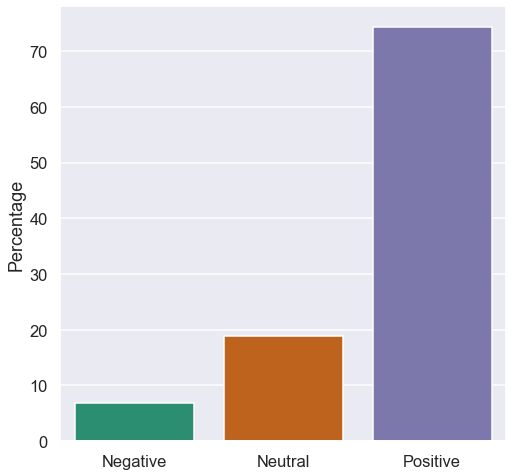

In [113]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

<br>

### Question Sentences Analysis:

In [123]:
results = []
for line in question_sentences:
    pol_score = sia.polarity_scores(line)
    pol_score['sentence'] = line
    results.append(pol_score)

df = pd.DataFrame.from_records(results)
df['label'] = 0
df.loc[df['compound'] > 0.3, 'label'] = 1
df.loc[df['compound'] < -0.3, 'label'] = -1
df.head(5)

,neg,neu,pos,compound,sentence,label
0,0.146,0.782,0.072,-0.3491,I was slightly disappointed that the headset h...,-1
1,0.000,1.000,0.000,0.0000,"However , how much would it cost to take a for...",0
2,0.000,0.690,0.310,0.4019,Interested in knowing where you are going ?,1
3,0.000,1.000,0.000,0.0000,How about the current temperature ?,0
4,0.000,0.828,0.172,0.4019,Are you just the slightest bit interested in w...,1


In [124]:
print("Positive sentence:\n")
pprint(list(df[df['label'] == 1].sentence)[:3], width=200)

print("\nNegative sentence:\n")
pprint(list(df[df['label'] == -1].sentence)[:3], width=200)

Positive sentence:

['Interested in knowing where you are going ?',
 'Are you just the slightest bit interested in what your current altitude may be ?',
 "I 'm a major Converse fan , I like to collect them in all different colors , why not pink ?"]

Negative sentence:

['I was slightly disappointed that the headset headphones did not play the audio , and instead the computer speakers played the audio , so why do I need a headset for just the microphone ?',
 "It 's Ugly , it squishes , and the fit feels weird at first and did I mention ugly ?",
 "That sounds awful , does n't it ?"]


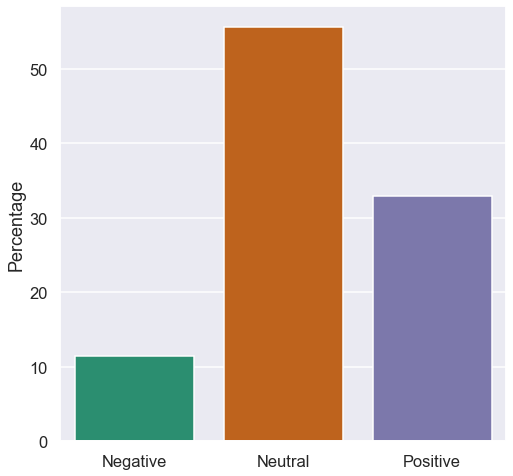

In [125]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

<br>